#### Загрузка набора данных

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import linear_model, tree, neighbors, ensemble
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.pipeline import make_pipeline


df = pd.read_csv("../data/car_price_prediction.csv")

df = df.drop(columns=["ID"])

random_state = 9

set_config(transform_output="pandas")

df

Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399          LEXUS   RX 450        2010       Jeep   
1      16621  1018      CHEVROLET  Equinox        2011       Jeep   
2       8467     -          HONDA      FIT        2006  Hatchback   
3       3607   862           FORD   Escape        2011       Jeep   
4      11726   446          HONDA      FIT        2014  Hatchback   
...      ...   ...            ...      ...         ...        ...   
19232   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0         Automatic          4x4  04-May        Left wheel  Silver       12  
1         Tiptronic          4x4  04-May        Left wheel   Black        8  
2          Variator        Front  04-May  Right-hand drive   Black        2  
3         Automatic          4x4  04-May        Left wheel   White        0  
4         Automatic        Front  04-May        Left wheel  Silver        4  
...             ...          ...     ...               ...     ...      ...  
19232        Manual         Rear  02-Mar        Left wheel  Silver        5  
19233     Tiptronic        Front  04-May        Left wheel     Red        8  
19234     Automatic        Front  04-May        Left wheel    Grey        4  
19235     Automatic        Front  04-May        Left wheel   Black        4  
19236     Automatic        Front  04-May        Left wheel   White       12  

[19237 rows x 17 columns]

#### Анализ датасета и очистка данных

In [31]:
df.dtypes

Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [32]:
df["Engine volume"] = df["Engine volume"].str.replace("Turbo", "")
df["Engine volume"] = pd.to_numeric(df["Engine volume"])
df["Engine volume"].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [33]:
df["Mileage"] = df["Mileage"].str.replace("km", "")
df["Mileage"] = df["Mileage"].astype("int64")
df["Mileage"].unique()

array([186005, 192000, 200000, ..., 140607, 307325, 186923])

In [34]:
df["Levy"] = df["Levy"].replace("-", "0")
df["Levy"] = df["Levy"].astype("int64")
df["Levy"].unique()

array([ 1399,  1018,     0,   862,   446,   891,   761,   751,   394,
        1053,  1055,  1079,   810,  2386,  1850,   531,   586,  1249,
        2455,   583,  1537,  1288,   915,  1750,   707,  1077,  1486,
        1091,   650,   382,  1436,  1194,   503,  1017,  1104,   639,
         629,   919,   781,   530,   640,   765,   777,   779,   934,
         769,   645,  1185,  1324,   830,  1187,  1111,   760,   642,
        1604,  1095,   966,   473,  1138,  1811,   988,   917,  1156,
         687, 11714,   836,  1347,  2866,  1646,   259,   609,   697,
         585,   475,   690,   308,  1823,  1361,  1273,   924,   584,
        2078,   831,  1172,   893,  1872,  1885,  1266,   447,  2148,
        1730,   730,   289,   502,   333,  1325,   247,   879,  1342,
        1327,  1598,  1514,  1058,   738,  1935,   481,  1522,  1282,
         456,   880,   900,   798,  1277,   442,  1051,   790,  1292,
        1047,   528,  1211,  1493,  1793,   574,   930,  1998,   271,
         706,  1481,

In [35]:
df["Cylinders"] = df["Cylinders"].astype("int64")
df["Cylinders"].unique()

array([ 6,  4,  8,  1, 12,  3,  2, 16,  5,  7,  9, 10, 14])

In [36]:
df["Doors"].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [37]:
df["Doors"] = df["Doors"].map(
    {"02-Mar": "Двухдверный", "04-May": "Четырехдверный", ">5": "Многодверный"}
)
df["Doors"].unique()

array(['Четырехдверный', 'Двухдверный', 'Многодверный'], dtype=object)

In [38]:
sorted_df = df.sort_values(by="Price")
sorted_df["Price"].unique()

array([       1,        3,        6, ...,   627220,   872946, 26307500])

In [39]:
print(f"Количество строк до удаления некорректных значений: {len(df)}")
df = df[df["Price"] >= 500]
print(f"Количество строк после удаления некорректных значений: {len(df)}")

Количество строк до удаления некорректных значений: 19237
Количество строк после удаления некорректных значений: 17574


In [40]:
sorted_df = df.sort_values(by="Price")
sorted_df["Price"].unique()

array([     500,      549,      600, ...,   627220,   872946, 26307500])

In [41]:
sorted_df = df.sort_values(by="Prod. year")
sorted_df["Prod. year"].unique()

array([1943, 1953, 1957, 1964, 1965, 1968, 1973, 1974, 1977, 1978, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [42]:
df

Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399          LEXUS   RX 450        2010       Jeep   
1      16621  1018      CHEVROLET  Equinox        2011       Jeep   
2       8467     0          HONDA      FIT        2006  Hatchback   
3       3607   862           FORD   Escape        2011       Jeep   
4      11726   446          HONDA      FIT        2014  Hatchback   
...      ...   ...            ...      ...         ...        ...   
19231   5802  1055  MERCEDES-BENZ    E 350        2013      Sedan   
19232   8467     0  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288      CHEVROLET  Captiva        2007       Jeep   

      Leather interior Fuel type  Engine volume  Mileage  Cylinders  \
0                  Yes    Hybrid            3.5   186005          6   
1                   No    Petrol            3.0   192000          6   
2                   No    Petrol            1.3   200000          4   
3                  Yes    Hybrid            2.5   168966          4   
4                  Yes    Petrol            1.3    91901          4   
...                ...       ...            ...      ...        ...   
19231              Yes    Diesel            3.5   107800          6   
19232              Yes       CNG            2.0   300000          4   
19233              Yes    Petrol            2.4   161600          4   
19234              Yes    Diesel            2.0   116365          4   
19235              Yes    Diesel            2.0    51258          4   

      Gear box type Drive wheels           Doors             Wheel   Color  \
0         Automatic          4x4  Четырехдверный        Left wheel  Silver   
1         Tiptronic          4x4  Четырехдверный        Left wheel   Black   
2          Variator        Front  Четырехдверный  Right-hand drive   Black   
3         Automatic          4x4  Четырехдверный        Left wheel   White   
4         Automatic        Front  Четырехдверный        Left wheel  Silver   
...             ...          ...             ...               ...     ...   
19231     Automatic         Rear  Четырехдверный        Left wheel    Grey   
19232        Manual         Rear     Двухдверный        Left wheel  Silver   
19233     Tiptronic        Front  Четырехдверный        Left wheel     Red   
19234     Automatic        Front  Четырехдверный        Left wheel    Grey   
19235     Automatic        Front  Четырехдверный        Left wheel   Black   

       Airbags  
0           12  
1            8  
2            2  
3            0  
4            4  
...        ...  
19231       12  
19232        5  
19233        8  
19234        4  
19235        4  

[17574 rows x 17 columns]

#### Очистка дубликатов и пропущенных значений

In [43]:
df.duplicated().sum()

np.int64(2773)

In [44]:
df.drop_duplicates(inplace=True)
# df.duplicated().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_18064\1689817098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [45]:
df.isna().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

#### Очистка выбросов

In [46]:
df.dtypes

Price                 int64
Levy                  int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

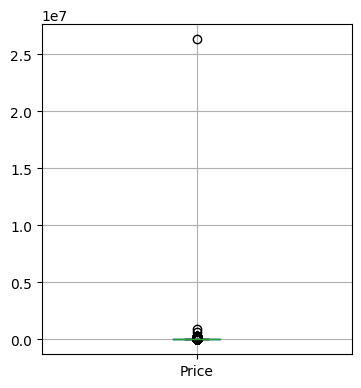

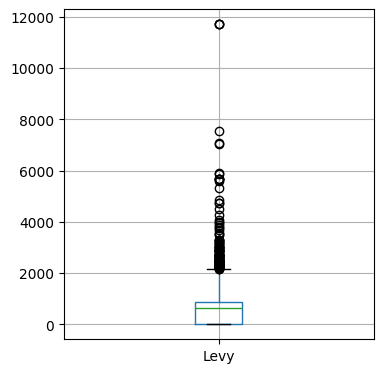

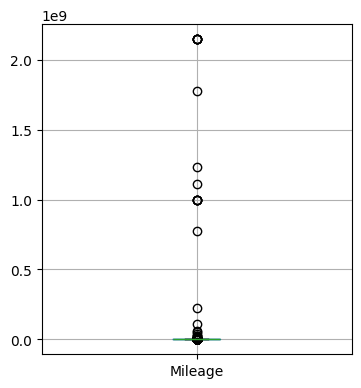

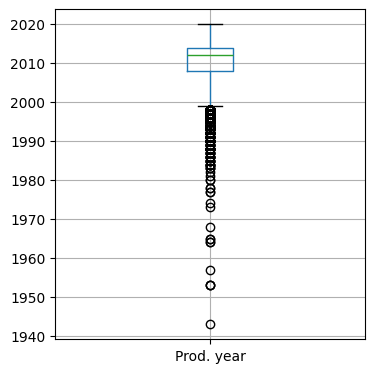

In [47]:
numeric_features_with_outliers = [
    "Price",
    "Levy",
    "Mileage",
    "Prod. year",
]

i = 1
for col in numeric_features_with_outliers:
    plt.figure(figsize=(4, 30))
    plt.subplot(6, 1, i)
    df.boxplot(column=col)
    i += 1

In [48]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print(f"Количество строк до удаления выбросов: {len(df)}")

for column in numeric_features_with_outliers:
    df = remove_outliers(df, column)

print(f"Количество строк после удаления выбросов: {len(df)}")

Количество строк до удаления выбросов: 14801
Количество строк после удаления выбросов: 12597


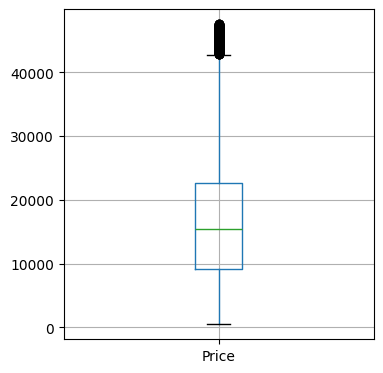

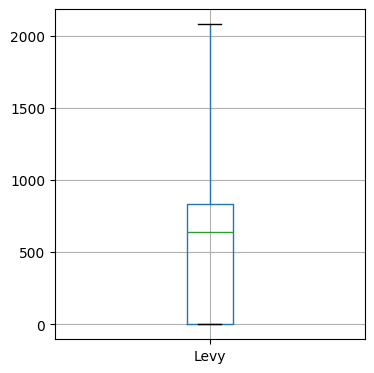

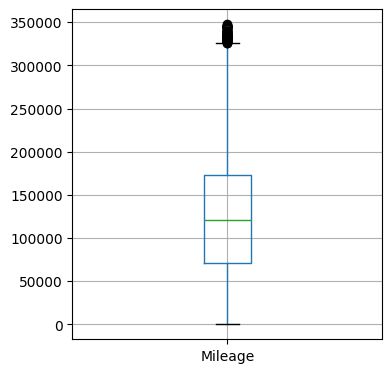

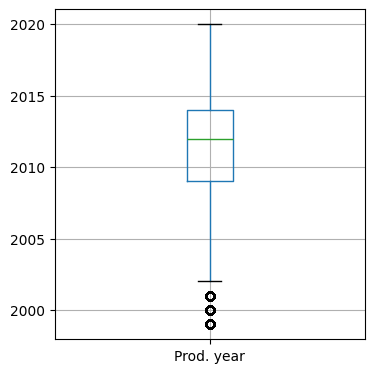

In [49]:
i = 1
for col in numeric_features_with_outliers:
    plt.figure(figsize=(4, 30))
    plt.subplot(6, 1, i)
    df.boxplot(column=col)
    i += 1

#### Формирование конвейера для классификации данных

In [50]:
df.dtypes

Price                 int64
Levy                  int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [51]:
columns_to_drop = [
    "Model",
    # "Manufacturer",
    "Color",
    "Doors",
    "Cylinders",
    "Mileage",
]

num_columns = [
    column
    for column in df.columns
    if column not in columns_to_drop and df[column].dtype != "object"
]

cat_columns = [
    column
    for column in df.columns
    if column not in columns_to_drop and df[column].dtype == "object"
]

cat_cols_for_one_hot_enc = [
    "Leather interior",
    "Category",
    "Fuel type",
    "Gear box type",
    "Drive wheels",
    # "Doors",
    "Wheel",
    "Manufacturer",
]

cat_cols_for_num_enc = [
    # "Model",
    # "Manufacturer",
    # "Color",
]

num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_one_hot_encoder = OneHotEncoder(
    handle_unknown="ignore", sparse_output=False, drop="first"
)
preprocessing_one_hot = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_one_hot_encoder),
    ]
)

preprocessing_label_enc = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", OrdinalEncoder()),
    ]
)

features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_one_hot", preprocessing_one_hot, cat_cols_for_one_hot_enc),
        ("prepocessing_label_enc", preprocessing_label_enc, cat_cols_for_num_enc),
        ("prepocessing_num", preprocessing_num, num_columns),
    ],
    remainder="passthrough",
)

drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)

pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("drop_columns", drop_columns),
    ]
)

#### Демонстрация работы конвейера для предобработки данных

In [52]:
preprocessing_result = pipeline_end.fit_transform(df)
df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

df

Leather interior_Yes  Category_Coupe  Category_Goods wagon  \
0                       1.0             0.0                   0.0   
1                       0.0             0.0                   0.0   
2                       0.0             0.0                   0.0   
3                       1.0             0.0                   0.0   
4                       1.0             0.0                   0.0   
...                     ...             ...                   ...   
19225                   0.0             0.0                   1.0   
19226                   1.0             0.0                   0.0   
19232                   1.0             1.0                   0.0   
19233                   1.0             0.0                   0.0   
19234                   1.0             0.0                   0.0   

       Category_Hatchback  Category_Jeep  Category_Limousine  \
0                     0.0            1.0                 0.0   
1                     0.0            1.0                 0.0   
2                     1.0            0.0                 0.0   
3                     0.0            1.0                 0.0   
4                     1.0            0.0                 0.0   
...                   ...            ...                 ...   
19225                 0.0            0.0                 0.0   
19226                 0.0            0.0                 0.0   
19232                 0.0            0.0                 0.0   
19233                 0.0            0.0                 0.0   
19234                 0.0            1.0                 0.0   

       Category_Microbus  Category_Minivan  Category_Pickup  Category_Sedan  \
0                    0.0               0.0              0.0             0.0   
1                    0.0               0.0              0.0             0.0   
2                    0.0               0.0              0.0             0.0   
3                    0.0               0.0              0.0             0.0   
4                    0.0               0.0              0.0             0.0   
...                  ...               ...              ...             ...   
19225                0.0               0.0              0.0             0.0   
19226                0.0               0.0              0.0             1.0   
19232                0.0               0.0              0.0             0.0   
19233                0.0               0.0              0.0             1.0   
19234                0.0               0.0              0.0             0.0   

       ...  Manufacturer_UAZ  Manufacturer_VAZ  Manufacturer_VOLKSWAGEN  \
0      ...               0.0               0.0                      0.0   
1      ...               0.0               0.0                      0.0   
2      ...               0.0               0.0                      0.0   
3      ...               0.0               0.0                      0.0   
4      ...               0.0               0.0                      0.0   
...    ...               ...               ...                      ...   
19225  ...               0.0               0.0                      0.0   
19226  ...               0.0               0.0                      0.0   
19232  ...               0.0               0.0                      0.0   
19233  ...               0.0               0.0                      0.0   
19234  ...               0.0               0.0                      0.0   

       Manufacturer_VOLVO  Manufacturer_სხვა     Price      Levy  Prod. year  \
0                     0.0                0.0 -0.332733  1.851925   -0.224219   
1                     0.0                0.0 -0.029023  1.024150   -0.007434   
2                     0.0                0.0 -0.781060 -1.187596   -1.091356   
3                     0.0                0.0 -1.229294  0.685218   -0.007434   
4                     0.0                0.0 -0.480485 -0.218599    0.642919   
...                   ...                ...       ...       ...         ...   

#### Разбиение на выборки


In [53]:
train_df, test_df = train_test_split(
    df, test_size=0.3, random_state=42
)

print("Размеры выборок:")
print(f"Обучающая выборка: {train_df.shape[0]} записей")
print(f"Тестовая выборка: {test_df.shape[0]} записей")

Размеры выборок:
Обучающая выборка: 8817 записей
Тестовая выборка: 3780 записей


In [54]:
price_y_train = train_df["Price"]
price_y_test = test_df["Price"]
train_df.drop(columns=["Price"], inplace=True)
test_df.drop(columns=["Price"], inplace=True)

train_df

Leather interior_Yes  Category_Coupe  Category_Goods wagon  \
15146                   0.0             0.0                   0.0   
14145                   0.0             0.0                   0.0   
8943                    0.0             0.0                   0.0   
17889                   1.0             0.0                   0.0   
9515                    1.0             0.0                   0.0   
...                     ...             ...                   ...   
18201                   1.0             0.0                   0.0   
7436                    1.0             0.0                   0.0   
7728                    0.0             0.0                   0.0   
1136                    0.0             0.0                   0.0   
10640                   1.0             0.0                   0.0   

       Category_Hatchback  Category_Jeep  Category_Limousine  \
15146                 0.0            0.0                 0.0   
14145                 0.0            0.0                 0.0   
8943                  0.0            0.0                 0.0   
17889                 0.0            1.0                 0.0   
9515                  0.0            0.0                 0.0   
...                   ...            ...                 ...   
18201                 0.0            0.0                 0.0   
7436                  0.0            0.0                 0.0   
7728                  1.0            0.0                 0.0   
1136                  0.0            0.0                 0.0   
10640                 0.0            0.0                 0.0   

       Category_Microbus  Category_Minivan  Category_Pickup  Category_Sedan  \
15146                0.0               0.0              0.0             1.0   
14145                0.0               0.0              0.0             1.0   
8943                 0.0               0.0              0.0             1.0   
17889                0.0               0.0              0.0             0.0   
9515                 0.0               0.0              0.0             0.0   
...                  ...               ...              ...             ...   
18201                0.0               0.0              0.0             1.0   
7436                 0.0               0.0              0.0             1.0   
7728                 0.0               0.0              0.0             0.0   
1136                 0.0               0.0              0.0             1.0   
10640                0.0               0.0              0.0             1.0   

       ...  Manufacturer_TOYOTA  Manufacturer_UAZ  Manufacturer_VAZ  \
15146  ...                  1.0               0.0               0.0   
14145  ...                  1.0               0.0               0.0   
8943   ...                  0.0               0.0               0.0   
17889  ...                  0.0               0.0               0.0   
9515   ...                  0.0               0.0               0.0   
...    ...                  ...               ...               ...   
18201  ...                  0.0               0.0               0.0   
7436   ...                  0.0               0.0               0.0   
7728   ...                  1.0               0.0               0.0   
1136   ...                  0.0               0.0               0.0   
10640  ...                  0.0               0.0               0.0   

       Manufacturer_VOLKSWAGEN  Manufacturer_VOLVO  Manufacturer_სხვა  \
15146                      0.0                 0.0                0.0   
14145                      0.0                 0.0                0.0   
8943                       0.0                 0.0                0.0   
17889                      0.0                 0.0                0.0   
9515                       0.0                 0.0                0.0   
...                        ...                 ...                ...   
18201                      0.0                 0.0                0.0   
7436                   

#### Формирование набора моделей

In [55]:
models = {
    "linear": {"model": linear_model.LinearRegression(n_jobs=-1)},
    # "linear_poly": {
    #     "model": make_pipeline(
    #         PolynomialFeatures(degree=2),
    #         linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
    #     )
    # },
    # "linear_interact": {
    #     "model": make_pipeline(
    #         PolynomialFeatures(interaction_only=True),
    #         linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
    #     )
    # },
    "ridge": {"model": linear_model.RidgeCV()},
    "decision_tree": {
        "model": tree.DecisionTreeRegressor(max_depth=7, random_state=random_state)
    },
    "knn": {"model": neighbors.KNeighborsRegressor(n_neighbors=7, n_jobs=-1)},
    "random_forest": {
        "model": ensemble.RandomForestRegressor(
            max_depth=7, random_state=random_state, n_jobs=-1
        )
    },
}

#### Обучение и оценка моделей с помощью различных алгоритмов

In [56]:
for model_name in models.keys():
    print(f"Model: {model_name}")

    model = models[model_name]["model"]

    fitted_model = model.fit(train_df.values, price_y_train.values.ravel())

    y_train_pred = fitted_model.predict(train_df)
    y_test_pred = fitted_model.predict(test_df)

    models[model_name]["fitted"] = fitted_model
    models[model_name]["train_preds"] = y_train_pred
    models[model_name]["preds"] = y_test_pred

    models[model_name]["RMSE_train"] = math.sqrt(
        metrics.mean_squared_error(price_y_train, y_train_pred)
    )
    models[model_name]["RMSE_test"] = math.sqrt(
        metrics.mean_squared_error(price_y_test, y_test_pred)
    )
    models[model_name]["RMAE_test"] = math.sqrt(
        metrics.mean_absolute_error(price_y_test, y_test_pred)
    )
    models[model_name]["R2_test"] = metrics.r2_score(price_y_test, y_test_pred)

Model: linear


c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Model: ridge


c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\user\source\repo

Model: decision_tree
Model: knn
Model: random_forest


c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


#### Вывод результатов оценки

In [57]:
reg_metrics = pd.DataFrame.from_dict(models, "index")[
    ["RMSE_train", "RMSE_test", "RMAE_test", "R2_test"]
]
reg_metrics.sort_values(by="RMSE_test").style.background_gradient(
    cmap="viridis", low=1, high=0.3, subset=["RMSE_train", "RMSE_test"]
).background_gradient(cmap="plasma", low=0.3, high=1, subset=["RMAE_test", "R2_test"])

In [58]:
best_model = str(reg_metrics.sort_values(by="RMSE_test").iloc[0].name)

display(best_model)

'knn'

#### Вывод предсказаний для выборок

In [59]:
pd.concat(
    [
        train_df,
        price_y_train,
        pd.Series(
            models[best_model]["train_preds"],
            index=price_y_train.index,
            name="PricePred",
        ),
    ],
    axis=1,
).head(5)

Leather interior_Yes  Category_Coupe  Category_Goods wagon  \
15146                   0.0             0.0                   0.0   
14145                   0.0             0.0                   0.0   
8943                    0.0             0.0                   0.0   
17889                   1.0             0.0                   0.0   
9515                    1.0             0.0                   0.0   

       Category_Hatchback  Category_Jeep  Category_Limousine  \
15146                 0.0            0.0                 0.0   
14145                 0.0            0.0                 0.0   
8943                  0.0            0.0                 0.0   
17889                 0.0            1.0                 0.0   
9515                  0.0            0.0                 0.0   

       Category_Microbus  Category_Minivan  Category_Pickup  Category_Sedan  \
15146                0.0               0.0              0.0             1.0   
14145                0.0               0.0              0.0             1.0   
8943                 0.0               0.0              0.0             1.0   
17889                0.0               0.0              0.0             0.0   
9515                 0.0               0.0              0.0             0.0   

       ...  Manufacturer_VAZ  Manufacturer_VOLKSWAGEN  Manufacturer_VOLVO  \
15146  ...               0.0                      0.0                 0.0   
14145  ...               0.0                      0.0                 0.0   
8943   ...               0.0                      0.0                 0.0   
17889  ...               0.0                      0.0                 0.0   
9515   ...               0.0                      0.0                 0.0   

       Manufacturer_სხვა      Levy  Prod. year  Engine volume   Airbags  \
15146                0.0 -1.187596    1.943625      -0.487669 -0.673150   
14145                0.0 -1.187596   -0.874572      -0.900100 -1.179883   
8943                 0.0  0.081225    0.642919      -0.487669  0.847049   
17889                0.0 -1.187596   -1.524925       0.474671 -0.419784   
9515                 0.0  1.695495    1.510056       0.474671 -0.673150   

          Price  PricePred  
15146  0.144553   0.557766  
14145 -0.665312  -0.603334  
8943  -0.144678  -0.355422  
17889 -0.462869  -0.746737  
9515   2.765339   2.375842  

[5 rows x 84 columns]

In [60]:
pd.concat(
    [
        test_df,
        price_y_test,
        pd.Series(
            models[best_model]["preds"],
            index=price_y_test.index,
            name="PricePred",
        ),
    ],
    axis=1,
).head(5)

Leather interior_Yes  Category_Coupe  Category_Goods wagon  \
10968                   1.0             0.0                   0.0   
1121                    1.0             0.0                   0.0   
4355                    1.0             0.0                   0.0   
17702                   1.0             0.0                   0.0   
6167                    0.0             0.0                   0.0   

       Category_Hatchback  Category_Jeep  Category_Limousine  \
10968                 1.0            0.0                 0.0   
1121                  0.0            0.0                 0.0   
4355                  0.0            0.0                 0.0   
17702                 1.0            0.0                 0.0   
6167                  0.0            0.0                 0.0   

       Category_Microbus  Category_Minivan  Category_Pickup  Category_Sedan  \
10968                0.0               0.0              0.0             0.0   
1121                 0.0               0.0              0.0             1.0   
4355                 0.0               0.0              0.0             1.0   
17702                0.0               0.0              0.0             0.0   
6167                 0.0               0.0              0.0             1.0   

       ...  Manufacturer_VAZ  Manufacturer_VOLKSWAGEN  Manufacturer_VOLVO  \
10968  ...               0.0                      0.0                 0.0   
1121   ...               0.0                      0.0                 0.0   
4355   ...               0.0                      0.0                 0.0   
17702  ...               0.0                      0.0                 0.0   
6167   ...               0.0                      0.0                 0.0   

       Manufacturer_სხვა      Levy  Prod. year  Engine volume   Airbags  \
10968                0.0 -0.055651   -0.007434      -1.037578  1.353782   
1121                 0.0 -0.331577    0.642919       0.474671  1.353782   
4355                 0.0  0.398430    1.076487      -0.762623 -0.673150   
17702                0.0  0.528788   -0.441003      -0.762623 -0.673150   
6167                 0.0  0.719981   -0.441003      -0.487669  0.340316   

          Price  PricePred  
10968 -1.316082  -0.960788  
1121  -1.489657  -0.235577  
4355   0.771343   0.887499  
17702 -0.679792  -0.579671  
6167  -0.173638  -0.471104  

[5 rows x 84 columns]